In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kde
#import seaborn as sns
import os.path as path

In [4]:
# Initialize the array's 
x_arr = np.array([])
y_arr = np.array([])

# File names
filepath = '/home/hakon/Documents/Code/md-photoemission-phd/data/out'
filename_x = path.join(filepath, 'density_emit_x.bin') # x position
filename_y = path.join(filepath, 'density_emit_y.bin') # y position
filename_e = path.join(filepath, 'density_emit_e.bin') # Number of the emitter
filename_s = path.join(filepath, 'density_emit_s.bin') # Section on the emitter

# Memory map the files to array's
# dtype=float64 (File contains double precision numbers)
# dtype=int32 (File contains 32bit integers)
# mode=r (Read only)
# order=F (Fortran style array)
x_arr = np.memmap(filename_x, dtype='float64', mode='r', order='F')
y_arr = np.memmap(filename_y, dtype='float64', mode='r', order='F')
emit  = np.memmap(filename_e, dtype='int32', mode='r', order='F')
sec   = np.memmap(filename_s, dtype='int32', mode='r', order='F')

FileNotFoundError: [Errno 2] No such file or directory: '/home/hakon/Documents/Code/md-photoemission-phd/data/out/density_emit_x.bin'

In [94]:
data = np.vstack((x_arr, y_arr)).T
data.shape

(57673, 2)

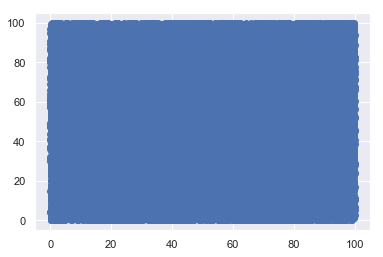

In [95]:
plt.scatter(x_arr, y_arr)

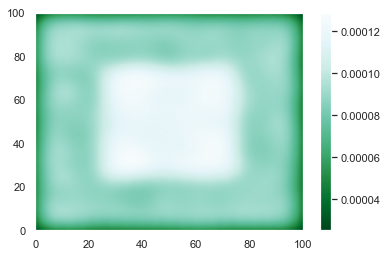

In [96]:
# https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/

nbins = 250
x, y = data.T

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

fig = plt.figure()
im = plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
fig.colorbar(im)

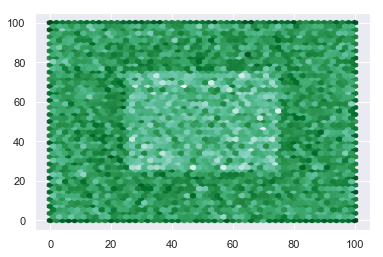

In [97]:
nbins = 50
plt.hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

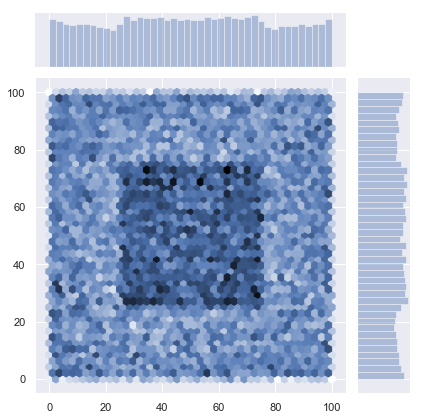

In [98]:
sns.set(style="darkgrid")
sns.jointplot(x=x, y=y, kind='hex')

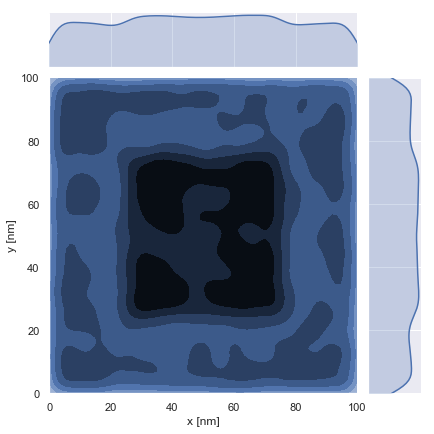

In [99]:
sns.set(style="darkgrid")
h = sns.jointplot(x=x, y=y, kind='kde', xlim={0, 100}, ylim={0, 100})
h.set_axis_labels('x [nm]', 'y [nm]')

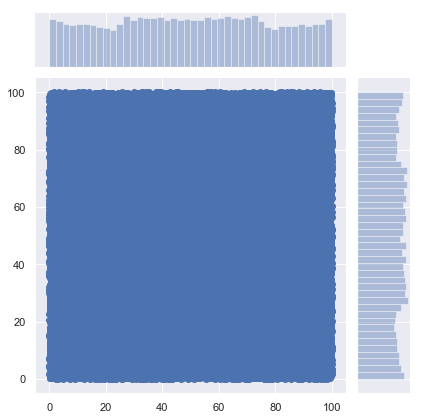

In [100]:
sns.set(style="darkgrid")
sns.jointplot(x=x, y=y, kind='scatter')